In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
main = pd.read_csv('../updated datasources/specialty_totals.csv')

In [27]:
main

,specialty_id,specialty,compensation_score,satisfaction_score,happiness_score,pre_covid_total,post_comp_score,post_sat_score,post_hap_score,post_covid_total,total_average
0,5,Dermatology,28,19,23,71,25,27,22,74,73
1,21,Plastic Surgery,17,18,22,57,19,24,13,56,57
2,22,Psychiatry,18,17,20,56,17,16,15,48,52
3,11,Oncology,15,22,19,56,7,18,12,38,47
4,18,Orthopedics,17,18,21,56,22,29,23,75,66
5,9,Gastroenterology,16,21,18,55,16,22,18,56,56
6,17,Ophthalmology,14,15,25,54,18,24,19,61,58
7,3,Cardiovascular Disease,20,20,13,54,19,18,16,53,54
8,23,Pulmonary Disease,14,18,19,51,15,5,17,38,45
9,19,Pathology,18,12,21,51,18,11,17,46,49


In [28]:
postcovid = main[['specialty_id', 'specialty', 'post_comp_score', 'post_sat_score', 
                  'post_hap_score', 'post_covid_total', 'total_average']].copy()

In [29]:
postcovid = postcovid.rename(columns = {'post_comp_score' : 'comp_score', 
                                        'post_sat_score' : 'sat_score',
                                        'post_hap_score' : 'hap_score',
                                        'post_covid_total' : 'total'})

In [30]:
postcovid.head()

,specialty_id,specialty,comp_score,sat_score,hap_score,total,total_average
0,5,Dermatology,25,27,22,74,73
1,21,Plastic Surgery,19,24,13,56,57
2,22,Psychiatry,17,16,15,48,52
3,11,Oncology,7,18,12,38,47
4,18,Orthopedics,22,29,23,75,66


In [31]:
postcovid.at[22, 'specialty'] = 'General Practice'
postcovid.at[14, 'specialty'] = 'Infectious Disease'
postcovid.at[20, 'specialty'] = 'Endocrinology'
postcovid.at[21, 'specialty'] = 'Immunology'
postcovid.at[24, 'specialty'] = 'Critical Care'
postcovid.at[7, 'specialty'] = 'Cardiovascular'
postcovid.at[8, 'specialty'] = 'Pulmonary'
postcovid.at[11, 'specialty'] = 'Emergency'
postcovid

,specialty_id,specialty,comp_score,sat_score,hap_score,total,total_average
0,5,Dermatology,25,27,22,74,73
1,21,Plastic Surgery,19,24,13,56,57
2,22,Psychiatry,17,16,15,48,52
3,11,Oncology,7,18,12,38,47
4,18,Orthopedics,22,29,23,75,66
5,9,Gastroenterology,16,22,18,56,56
6,17,Ophthalmology,18,24,19,61,58
7,3,Cardiovascular,19,18,16,53,54
8,23,Pulmonary,15,5,17,38,45
9,19,Pathology,18,11,17,46,49


In [32]:
precovid = main.drop(main.iloc[:, 6:10], axis = 1)

In [33]:
precovid = precovid.rename(columns = {'compensation_score' : 'comp_score', 
                                        'satisfaction_score' : 'sat_score',
                                        'happiness_score' : 'hap_score',
                                        'pre_covid_total' : 'total'})

In [34]:
precovid.head()

,specialty_id,specialty,comp_score,sat_score,hap_score,total,total_average
0,5,Dermatology,28,19,23,71,73
1,21,Plastic Surgery,17,18,22,57,57
2,22,Psychiatry,18,17,20,56,52
3,11,Oncology,15,22,19,56,47
4,18,Orthopedics,17,18,21,56,66


In [35]:
precovid.at[22, 'specialty'] = 'General Practice'
precovid.at[14, 'specialty'] = 'Infectious Disease'
precovid.at[20, 'specialty'] = 'Endocrinology'
precovid.at[21, 'specialty'] = 'Immunology'
precovid.at[24, 'specialty'] = 'Critical Care'
precovid.at[7, 'specialty'] = 'Cardiovascular'
precovid.at[8, 'specialty'] = 'Pulmonary'
precovid.at[11, 'specialty'] = 'Emergency'
precovid

,specialty_id,specialty,comp_score,sat_score,hap_score,total,total_average
0,5,Dermatology,28,19,23,71,73
1,21,Plastic Surgery,17,18,22,57,57
2,22,Psychiatry,18,17,20,56,52
3,11,Oncology,15,22,19,56,47
4,18,Orthopedics,17,18,21,56,66
5,9,Gastroenterology,16,21,18,55,56
6,17,Ophthalmology,14,15,25,54,58
7,3,Cardiovascular,20,20,13,54,54
8,23,Pulmonary,14,18,19,51,45
9,19,Pathology,18,12,21,51,49


In [36]:
avg_totals = precovid[['specialty_id', 'specialty', 'total_average']].copy()
avg_totals

,specialty_id,specialty,total_average
0,5,Dermatology,73
1,21,Plastic Surgery,57
2,22,Psychiatry,52
3,11,Oncology,47
4,18,Orthopedics,66
5,9,Gastroenterology,56
6,17,Ophthalmology,58
7,3,Cardiovascular,54
8,23,Pulmonary,45
9,19,Pathology,49


In [37]:
avg_totals['comp_score'] = (precovid['comp_score'] + postcovid['comp_score']) / 2
avg_totals['sat_score'] = (precovid['sat_score'] + postcovid['sat_score']) / 2
avg_totals['hap_score'] = (precovid['hap_score'] + postcovid['hap_score']) / 2
avg_totals

,specialty_id,specialty,total_average,comp_score,sat_score,hap_score
0,5,Dermatology,73,26.5,23.0,22.5
1,21,Plastic Surgery,57,18.0,21.0,17.5
2,22,Psychiatry,52,17.5,16.5,17.5
3,11,Oncology,47,11.0,20.0,15.5
4,18,Orthopedics,66,19.5,23.5,22.0
5,9,Gastroenterology,56,16.0,21.5,18.0
6,17,Ophthalmology,58,16.0,19.5,22.0
7,3,Cardiovascular,54,19.5,19.0,14.5
8,23,Pulmonary,45,14.5,11.5,18.0
9,19,Pathology,49,18.0,11.5,19.0


In [38]:
total_poles = pd.concat([avg_totals.sort_values('total_average', ascending=False).head().assign(dataset='top'), avg_totals.sort_values('total_average', ascending=False).tail().assign(dataset='bot')])
total_poles

,specialty_id,specialty,total_average,comp_score,sat_score,hap_score,dataset
0,5,Dermatology,73,26.5,23.0,22.5,top
4,18,Orthopedics,66,19.5,23.5,22.0,top
6,17,Ophthalmology,58,16.0,19.5,22.0,top
1,21,Plastic Surgery,57,18.0,21.0,17.5,top
5,9,Gastroenterology,56,16.0,21.5,18.0,top
14,12,Infectious Disease,32,8.0,7.5,16.0,bot
24,4,Critical Care,30,11.5,10.0,8.5,bot
25,13,Internal Medicine,30,8.5,6.0,14.5,bot
20,7,Endocrinology,29,4.0,8.0,15.5,bot
22,8,General Practice,27,9.0,6.5,11.0,bot


In [39]:
comp_poles = pd.concat([avg_totals.sort_values('comp_score', ascending=False).head().assign(dataset='top'), avg_totals.sort_values('comp_score', ascending=False).tail().assign(dataset='bot')])
comp_poles

,specialty_id,specialty,total_average,comp_score,sat_score,hap_score,dataset
0,5,Dermatology,73,26.5,23.0,22.5,top
10,24,Radiology,55,24.5,17.5,12.5,top
4,18,Orthopedics,66,19.5,23.5,22.0,top
7,3,Cardiovascular,54,19.5,19.0,14.5,top
11,6,Emergency,40,19.0,11.5,8.5,top
22,8,General Practice,27,9.0,6.5,11.0,bot
25,13,Internal Medicine,30,8.5,6.0,14.5,bot
14,12,Infectious Disease,32,8.0,7.5,16.0,bot
17,20,Pediatrics,33,7.0,12.0,13.5,bot
20,7,Endocrinology,29,4.0,8.0,15.5,bot


In [40]:
sat_poles = pd.concat([avg_totals.sort_values('sat_score', ascending=False).head().assign(dataset='top'), avg_totals.sort_values('sat_score', ascending=False).tail().assign(dataset='bot')])
sat_poles

,specialty_id,specialty,total_average,comp_score,sat_score,hap_score,dataset
4,18,Orthopedics,66,19.5,23.5,22.0,top
0,5,Dermatology,73,26.5,23.0,22.5,top
5,9,Gastroenterology,56,16.0,21.5,18.0,top
1,21,Plastic Surgery,57,18.0,21.0,17.5,top
3,11,Oncology,47,11.0,20.0,15.5,top
24,4,Critical Care,30,11.5,10.0,8.5,bot
20,7,Endocrinology,29,4.0,8.0,15.5,bot
14,12,Infectious Disease,32,8.0,7.5,16.0,bot
22,8,General Practice,27,9.0,6.5,11.0,bot
25,13,Internal Medicine,30,8.5,6.0,14.5,bot


In [41]:
hap_poles = pd.concat([avg_totals.sort_values('hap_score', ascending=False).head().assign(dataset='top'), avg_totals.sort_values('hap_score', ascending=False).tail().assign(dataset='bot')])
hap_poles

,specialty_id,specialty,total_average,comp_score,sat_score,hap_score,dataset
0,5,Dermatology,73,26.5,23.0,22.5,top
4,18,Orthopedics,66,19.5,23.5,22.0,top
6,17,Ophthalmology,58,16.0,19.5,22.0,top
9,19,Pathology,49,18.0,11.5,19.0,top
5,9,Gastroenterology,56,16.0,21.5,18.0,top
18,26,Urology,43,13.5,16.5,12.0,bot
16,15,Neurology,33,10.5,10.0,11.5,bot
22,8,General Practice,27,9.0,6.5,11.0,bot
11,6,Emergency,40,19.0,11.5,8.5,bot
24,4,Critical Care,30,11.5,10.0,8.5,bot


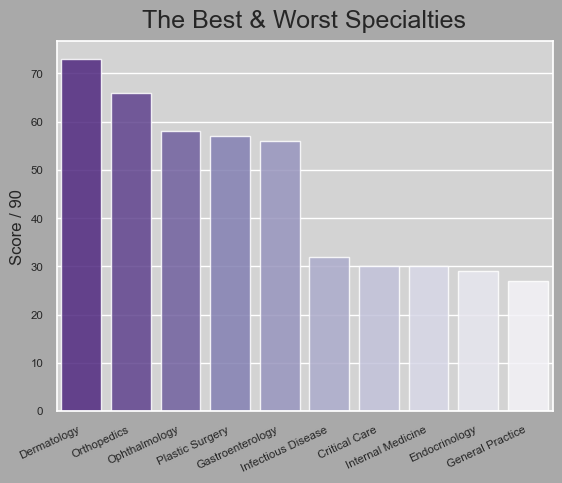

In [42]:
sns.set(font_scale=0.75, rc={'axes.facecolor':'lightgrey', 'figure.facecolor':'darkgrey'})

totals = sns.barplot(data=total_poles,
                   x='specialty',
                   y='total_average',
                   palette='Purples_r',
                   alpha=0.85,
                   saturation=0.8)

totals.axes.set_title("The Best & Worst Specialties", fontsize=18, pad=10)
totals.set_xlabel(None)
totals.set_ylabel('Score / 90', fontsize = 12)

totals.set_xticklabels(totals.get_xticklabels(), rotation=25, ha="right")

plt.savefig('charts/totals')
plt.show()

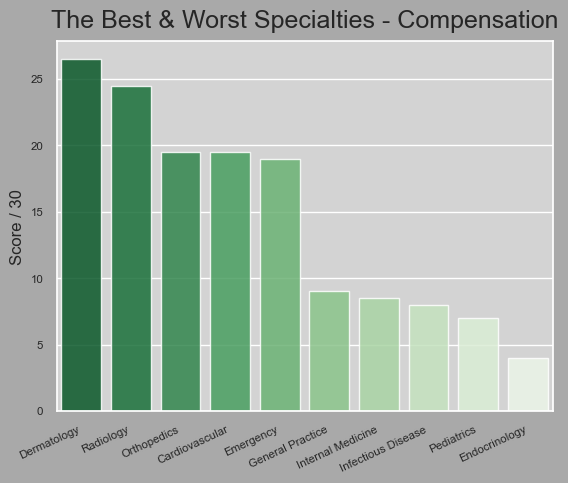

In [43]:
sns.set(font_scale=0.75, rc={'axes.facecolor':'lightgrey', 'figure.facecolor':'darkgrey'})

comp = sns.barplot(data=comp_poles,
                   x='specialty',
                   y='comp_score',
                   palette='Greens_r',
                   alpha=0.85,
                   saturation=0.8)

comp.axes.set_title("The Best & Worst Specialties - Compensation", fontsize=18, pad=10)
comp.set_xlabel(None)
comp.set_ylabel('Score / 30', fontsize = 12)

comp.set_xticklabels(comp.get_xticklabels(), rotation=25, ha="right")

plt.savefig('charts/compensation')
plt.show()

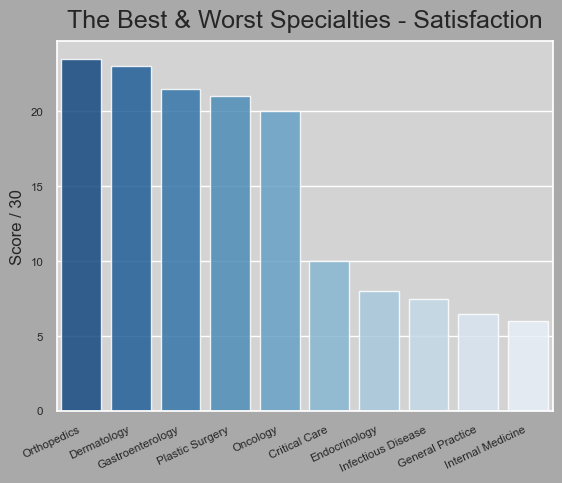

In [44]:
sns.set(font_scale=0.75, rc={'axes.facecolor':'lightgrey', 'figure.facecolor':'darkgrey'})

sat = sns.barplot(data=sat_poles,
                   x='specialty',
                   y='sat_score',
                   palette='Blues_r',
                   alpha=0.85,
                   saturation=0.8)

sat.axes.set_title("The Best & Worst Specialties - Satisfaction", fontsize=18, pad=10)
sat.set_xlabel(None)
sat.set_ylabel('Score / 30', fontsize = 12)

sat.set_xticklabels(sat.get_xticklabels(), rotation=25, ha="right")

plt.savefig('charts/satisfaction')
plt.show()

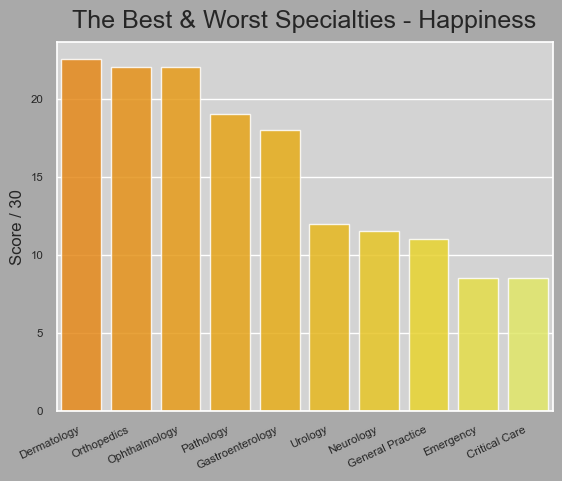

In [45]:
sns.set(font_scale=0.75, rc={'axes.facecolor':'lightgrey', 'figure.facecolor':'darkgrey'})

hap = sns.barplot(data=hap_poles,
                   x='specialty',
                   y='hap_score',
                   palette='Wistia_r',
                   alpha=0.85,
                   saturation=0.8)

hap.axes.set_title("The Best & Worst Specialties - Happiness", fontsize=18, pad=10)
hap.set_xlabel(None)
hap.set_ylabel('Score / 30', fontsize = 12)

hap.set_xticklabels(hap.get_xticklabels(), rotation=25, ha="right")

plt.savefig('charts/happiness')
plt.show()